In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import the csv
data=pd.read_csv("..\Web Scraping\predicting_house_price.csv")
data.head()

,Unnamed: 0,street,city,province,postal_code,fire_place,style,lat,lon,price,number_of_beds,number_of_baths,extra_space
0,0,6 HONEYBOURNE CRES,Markham,Ontario,L3P 1P3,1,Detached,43.856371,-79.337682,2998000,5,8,1
1,1,83 BOARDWALK DR,Toronto,Ontario,M4L 3X9,1,Detached,43.670890,-79.316931,2599900,3,4,0
2,2,2158 PINEVIEW DR,Oakville,Ontario,L6H 5M3,1,Detached,43.447436,-79.666672,1999000,5,4,0
3,3,4078 HWY #6 Highway S,Mount Hope,Ontario,L0R 1W0,1,Detached,43.156141,-79.916180,1425000,3,3,0
4,4,12 HERCULES CLUB DR,Richmond Hill,Ontario,L4K 1K6,1,Townhouse,43.880117,-79.439292,1199000,3,3,0


In [3]:
data=data.drop(columns=['Unnamed: 0','street','city','province','postal_code','style'])

In [4]:
# Exploratory data analysis
data.shape

(714, 7)

In [5]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [6]:
data.describe()

,fire_place,lat,lon,price,number_of_beds,number_of_baths,extra_space
count,714.00000,714.00000,714.00000,714.00000,714.00000,714.00000,714.00000
mean,1.00000,43.82829,-79.35949,1103421.65826,3.25770,2.99020,0.40196
std,0.00000,0.78410,1.66103,537043.59527,0.77168,1.05589,0.49064
min,1.00000,42.03790,-83.10865,1.00000,1.00000,1.00000,0.00000
25%,1.00000,43.44744,-79.87286,725625.00000,3.00000,2.00000,0.00000
50%,1.00000,43.68778,-79.54611,971950.00000,3.00000,3.00000,0.00000
75%,1.00000,44.05626,-79.20018,1349000.00000,4.00000,4.00000,1.00000
max,1.00000,46.66021,-74.49995,3000000.00000,6.00000,8.00000,1.00000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fire_place       714 non-null    int64  
 1   lat              714 non-null    float64
 2   lon              714 non-null    float64
 3   price            714 non-null    int64  
 4   number_of_beds   714 non-null    int64  
 5   number_of_baths  714 non-null    int64  
 6   extra_space      714 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 39.2 KB


In [8]:
# data['style']= data['style'].astype(float)

In [9]:
data.isna().sum()

fire_place         0
lat                0
lon                0
price              0
number_of_beds     0
number_of_baths    0
extra_space        0
dtype: int64

In [10]:
# sns.countplot(x="style", data = data)

C:\Users\anjali\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

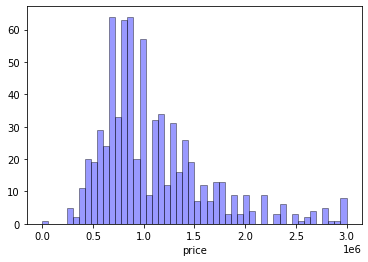

In [11]:
sns.distplot(data["price"], hist=True, kde=False, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'})

<AxesSubplot:xlabel='price', ylabel='Density'>

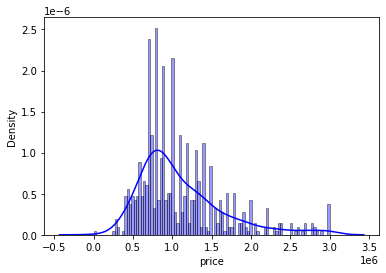

In [12]:
sns.distplot(data["price"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

Text(0, 0.5, 'Count')

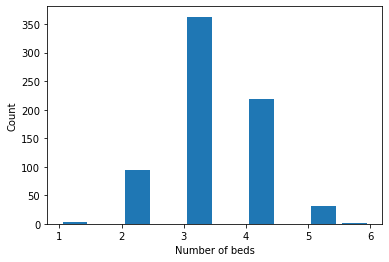

In [13]:
plt.hist(data.number_of_beds,rwidth=0.8)
plt.xlabel("Number of beds")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

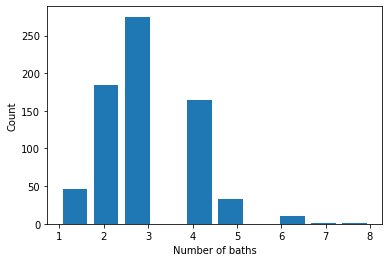

In [14]:
plt.hist(data.number_of_baths,rwidth=0.8)
plt.xlabel("Number of baths")
plt.ylabel("Count")

In [15]:
# data.city.describe()

In [16]:
# data = data.rename(columns={'style': 'house_style'})

In [17]:
# data.house_style.describe()

In [18]:
# splitting the data for machine learning
data.columns

Index(['fire_place', 'lat', 'lon', 'price', 'number_of_beds',
       'number_of_baths', 'extra_space'],
      dtype='object')

In [19]:
X= data[['fire_place', 
       'lat','lon','price', 'number_of_beds', 'number_of_baths', 'extra_space']]
X

,fire_place,lat,lon,price,number_of_beds,number_of_baths,extra_space
0,1,43.85637,-79.33768,2998000,5,8,1
1,1,43.67089,-79.31693,2599900,3,4,0
2,1,43.44744,-79.66667,1999000,5,4,0
3,1,43.15614,-79.91618,1425000,3,3,0
4,1,43.88012,-79.43929,1199000,3,3,0
...,...,...,...,...,...,...,...
709,1,43.58962,-79.64439,969000,3,3,0
710,1,43.68581,-79.75993,799000,3,3,0
711,1,43.40010,-80.64970,699900,2,3,1
712,1,44.64626,-80.72634,699000,2,3,1


In [20]:
Y=data['price']
Y

0      2998000
1      2599900
2      1999000
3      1425000
4      1199000
        ...   
709     969000
710     799000
711     699900
712     699000
713     515000
Name: price, Length: 714, dtype: int64

In [21]:
# install sklearn
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

In [23]:
X_train

,fire_place,lat,lon,price,number_of_beds,number_of_baths,extra_space
662,1,43.45129,-80.49278,2350000,4,4,0
39,1,43.32489,-79.79668,1624900,2,3,1
225,1,43.58962,-79.64439,999900,3,4,0
696,1,43.96869,-78.65136,999000,3,4,1
86,1,43.68581,-79.75993,999999,4,2,1
...,...,...,...,...,...,...,...
75,1,43.33142,-79.89568,1099900,4,3,0
599,1,43.07356,-79.95013,899000,4,3,0
575,1,44.38931,-79.69017,1049000,4,3,1
337,1,42.28382,-82.99709,274900,3,2,0


In [24]:
Y_train

662    2350000
39     1624900
225     999900
696     999000
86      999999
        ...   
75     1099900
599     899000
575    1049000
337     274900
523    1639000
Name: price, Length: 535, dtype: int64

In [25]:
X_test

,fire_place,lat,lon,price,number_of_beds,number_of_baths,extra_space
681,1,43.89756,-78.86353,749000,3,2,0
428,1,43.21675,-79.75676,899000,3,3,0
209,1,43.68581,-79.75993,1175000,4,3,0
547,1,43.75166,-79.44766,1299000,3,2,1
374,1,43.71275,-79.40663,1388000,3,3,0
...,...,...,...,...,...,...,...
274,1,44.36827,-80.06695,799000,4,3,0
510,1,43.79415,-79.52680,2048000,5,5,1
58,1,44.05626,-79.46171,1299900,3,3,1
497,1,42.41826,-82.20240,444900,3,2,1


In [26]:
Y_test

681     749000
428     899000
209    1175000
547    1299000
374    1388000
        ...   
274     799000
510    2048000
58     1299900
497     444900
260     825000
Name: price, Length: 179, dtype: int64

In [27]:
# normalization
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [28]:

X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [29]:
X_train


,fire_place,lat,lon,price,number_of_beds,number_of_baths,extra_space
662,1,43.45129,-80.49278,2350000,4,4,0
39,1,43.32489,-79.79668,1624900,2,3,1
225,1,43.58962,-79.64439,999900,3,4,0
696,1,43.96869,-78.65136,999000,3,4,1
86,1,43.68581,-79.75993,999999,4,2,1
...,...,...,...,...,...,...,...
75,1,43.33142,-79.89568,1099900,4,3,0
599,1,43.07356,-79.95013,899000,4,3,0
575,1,44.38931,-79.69017,1049000,4,3,1
337,1,42.28382,-82.99709,274900,3,2,0


In [30]:
X_train_std

array([[ 0.        , -0.46209543, -0.65925229, ...,  0.93792511,
         0.93050801, -0.80699106],
       [ 0.        , -0.62060281, -0.2362081 , ..., -1.60923191,
        -0.00524723,  1.2391711 ],
       [ 0.        , -0.28862309, -0.1436525 , ..., -0.3356534 ,
         0.93050801, -0.80699106],
       ...,
       [ 0.        ,  0.71420834, -0.17147814, ...,  0.93792511,
        -0.00524723,  1.2391711 ],
       [ 0.        , -1.9261368 , -2.18121145, ..., -0.3356534 ,
        -0.94100246, -0.80699106],
       [ 0.        , -0.19375223, -0.0182285 , ..., -0.3356534 ,
         0.93050801,  1.2391711 ]])

In [31]:
X_test_std

array([[ 0.        ,  0.09753315,  0.33090191, ..., -0.3356534 ,
        -0.94100246, -0.80699106],
       [ 0.        , -0.75621316, -0.2119461 , ..., -0.3356534 ,
        -0.00524723, -0.80699106],
       [ 0.        , -0.16799625, -0.21387391, ...,  0.93792511,
        -0.00524723, -0.80699106],
       ...,
       [ 0.        ,  0.29655016, -0.03263125, ..., -0.3356534 ,
        -0.00524723,  1.2391711 ],
       [ 0.        , -1.75754653, -1.69825295, ..., -0.3356534 ,
        -0.94100246,  1.2391711 ],
       [ 0.        ,  0.17533807,  0.75373704, ..., -0.3356534 ,
        -0.00524723, -0.80699106]])

In [32]:
Y_train

662    2350000
39     1624900
225     999900
696     999000
86      999999
        ...   
75     1099900
599     899000
575    1049000
337     274900
523    1639000
Name: price, Length: 535, dtype: int64

In [33]:
Y_test

681     749000
428     899000
209    1175000
547    1299000
374    1388000
        ...   
274     799000
510    2048000
58     1299900
497     444900
260     825000
Name: price, Length: 179, dtype: int64

In [34]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
lr=LinearRegression()

In [35]:
lr.fit(X_train_std,Y_train)


LinearRegression()

In [36]:
# predictions = lr.predict(X_test)

In [37]:
# # Print the balanced_accuracy score of the model
# from sklearn.metrics import accuracy_score
# testing_accuracy = balanced_accuracy_score(Y_test,predictions)
# testing_accuracy

In [38]:
Y_pred=lr.predict(X_test_std)
Y_pred

array([ 749000.,  899000., 1175000., 1299000., 1388000.,  999000.,
       1595000., 1199900., 1688000.,  949000.,  309900.,  499900.,
        999000.,  799900., 2999990., 1799000., 1099000.,  879000.,
        629000.,  875000.,  688000.,  515000., 1120000., 1099999.,
        899000.,  799999.,  899000.,  699000., 1195000.,  999999.,
        799900.,  799000.,  865000.,  849900., 1299000., 1099900.,
        999900.,  799000., 1399000.,  829900.,  679000.,  539900.,
        899000.,  659900.,  698800., 1499000.,  324900.,  799000.,
       1499900.,  899999.,  479000.,  699000.,  429900.,  554900.,
        999000.,  759900.,  849900., 1070000., 1299999., 1399000.,
        594900.,  899900.,  698736.,  809000.,  919900., 1199900.,
       1849999.,  775000.,  584900., 1798000.,  799000., 1049000.,
       1799000., 1399000., 1699990., 1649900.,  799999., 2649900.,
       2059000.,  799900.,  945000.,  934900., 1399900.,  719000.,
        739900.,  789000.,  998700.,  899000.,  799900., 21998

In [39]:
Y_test

681     749000
428     899000
209    1175000
547    1299000
374    1388000
        ...   
274     799000
510    2048000
58     1299900
497     444900
260     825000
Name: price, Length: 179, dtype: int64

In [40]:
score = lr.score(X, Y, sample_weight=None)

C:\Users\anjali\anaconda3\anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [41]:
mse= mean_squared_error(Y_test,Y_pred)

In [42]:
X_test

,fire_place,lat,lon,price,number_of_beds,number_of_baths,extra_space
681,1,43.89756,-78.86353,749000,3,2,0
428,1,43.21675,-79.75676,899000,3,3,0
209,1,43.68581,-79.75993,1175000,4,3,0
547,1,43.75166,-79.44766,1299000,3,2,1
374,1,43.71275,-79.40663,1388000,3,3,0
...,...,...,...,...,...,...,...
274,1,44.36827,-80.06695,799000,4,3,0
510,1,43.79415,-79.52680,2048000,5,5,1
58,1,44.05626,-79.46171,1299900,3,3,1
497,1,42.41826,-82.20240,444900,3,2,1


In [43]:
r2_score(Y_test,Y_pred)

1.0

In [47]:
rmse = np.sqrt(mse)
std = np.std(Y)
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")


The mean squared error is 9.229346705725069e-20.
The root mean squared error is 3.0379839870751575e-10.
The standard deviation is 536667.3825520616.


In [45]:
#  # Support vector machine linear classifier
# from sklearn.svm import SVC 
# model = SVC(kernel='linear')
# model.fit(X_train, Y_train)

In [46]:
# # Model Accuracy
# print('Test Acc: %.3f' % model.score(X_test, Y_test))